In [179]:
def solution(words, queries):
    answer = []    
    for i in queries:
        con = 0
        b = i.split('?')
        bh = b[0]
        bt = b[-1]
        b = list(filter(lambda x: len(x) != 0, b))

        for j in words:
            if len(i) == len(j):
                if len(b) == 0:
                    con += 1
                elif j[:len(b[0])] == (bh):
                    con += 1
                elif j[-len(b[0]):] == (bt):
                    con += 1
        answer.append(con)          
    return answer

In [1]:
import requests

url = "https://api.upbit.com/v1/candles/days"

querystring = {"market":"KRW-BTC","count":"10","convertingPriceUnit":"KRW"}

response = requests.request("GET", url, params=querystring)

# print(response.json()[0]['market'])
i = 0
a = []
while True:
    try:
        # print(response.json()[i]['trade_price'])
        c = response.json()[i]['trade_price']
        a.append(c)
        i += 1
    except:
        False
# print(response.json()[i]['trade_price'])
# print(response.json()[]['trade_price'])
a

KeyboardInterrupt: 

/home/aiffel-dj26/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


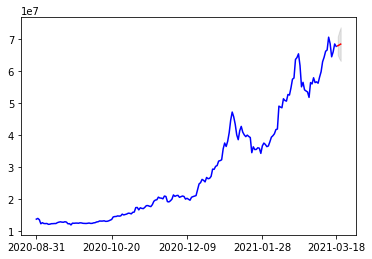

In [1]:
import requests
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
url = "https://api.upbit.com/v1/candles/days"

querystring = {"market":"KRW-BTC","count":"365","convertingPriceUnit":"KRW"}

response = requests.request("GET", url, params=querystring)

# print(len(response.json()))
date = min(len(response.json()),365)
a = []
b = []
for i in range(date):
    c = response.json()[date-i-1]['trade_price']
    a.append(c)
    c = response.json()[date-i-1]['candle_date_time_kst'].split("T")[0]
    b.append(c)
fu_list = []
for i in range(3):
    fu_list.append(c[:-2]+str(int(c[-2:])+i+1))

aa = pd.DataFrame(a,index=b,columns=['close'])
model = ARIMA(a, order=(1,1,0))
fitting = model.fit(disp=-1)
fc, se, conf = fitting.forecast(3, alpha=0.05)
low = list(map(lambda x: conf[:][x][0],range(3)))
up = list(map(lambda x: conf[:][x][1],range(3)))
plt.plot(aa, c='b', label='training dataset')
plt.plot(fu_list,fc, c='r',label='predicted price')
plt.fill_between(fu_list, low, up, color='k', alpha=.10)
plt.xticks([0,date/4,date/2,date*3/4,date-1])
plt.show()

In [14]:
def Predict(coinname: str):
    url = "https://api.upbit.com/v1/candles/days"
    querystring = {"market":coinname,"count":"365","convertingPriceUnit":"KRW"}
    response = requests.request("GET", url, params=querystring)
    date = min(len(response.json()),365)
    a = []
    b = []
    for i in range(date):
        c = response.json()[date-i-1]['trade_price']
        a.append(c)
        c = response.json()[date-i-1]['candle_date_time_kst'].split("T")[0]
        b.append(c)
    fu_list = []
    for i in range(3):
        fu_list.append(c[:-2]+str(int(c[-2:])+i+1))
    aa = pd.DataFrame(a,index=b,columns=['close'])
    model = ARIMA(a, order=(1,1,0))
    fitting = model.fit(disp=-1)
    fc, se, conf = fitting.forecast(3, alpha=0.05)
    low = list(map(lambda x: conf[:][x][0],range(3)))
    up = list(map(lambda x: conf[:][x][1],range(3)))
    predi = pd.DataFrame(np.array([low,fc,up]).T,index=fu_list,columns=['prediction_low','prediction','prediction_high'])
    return aa,predi

In [15]:
import numpy as np
q,b= Predict("KRW-BTC")

/home/aiffel-dj26/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [16]:
print(b)
b.to_dict

            prediction_low    prediction  prediction_high
2021-03-19    6.467159e+07  6.752124e+07     7.037090e+07
2021-03-20    6.355040e+07  6.777812e+07     7.200585e+07
2021-03-21    6.277474e+07  6.804648e+07     7.331821e+07


<bound method DataFrame.to_dict of             prediction_low    prediction  prediction_high
2021-03-19    6.467159e+07  6.752124e+07     7.037090e+07
2021-03-20    6.355040e+07  6.777812e+07     7.200585e+07
2021-03-21    6.277474e+07  6.804648e+07     7.331821e+07>

In [186]:
pd.DataFrame([low,fc,up],index=fu_list,columns=['prediction_low','prediction','prediction_high']) 

,prediction_low,prediction,prediction_high
2021-03-18,6.606455e+07,6.495137e+07,6.417561e+07
2021-03-19,6.890590e+07,6.918047e+07,6.945623e+07
2021-03-20,7.174725e+07,7.340957e+07,7.473685e+07


In [207]:
up = list(map(lambda x: conf[:][x][1],range(3)))

In [187]:
url = "https://api.upbit.com/v1/candles/days"

querystring = {"market":"KRW-BTC","count":"1","convertingPriceUnit":"KRW"}

response = requests.request("GET", url, params=querystring)
response.json()[0]

{'market': 'KRW-BTC',
 'candle_date_time_utc': '2021-03-18T00:00:00',
 'candle_date_time_kst': '2021-03-18T09:00:00',
 'opening_price': 68494000.0,
 'high_price': 69184000.0,
 'low_price': 67731000.0,
 'trade_price': 68098000.0,
 'timestamp': 1616043322281,
 'candle_acc_trade_price': 199894313743.33762,
 'candle_acc_trade_volume': 2923.65188235,
 'prev_closing_price': 68494000.0,
 'change_price': -396000.0,
 'change_rate': -0.0057815283,
 'converted_trade_price': None}

In [ ]:
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

In [125]:
# conf[:][0][0]
# fc
conf
low = list(map(lambda x: conf[:][x][0],range(3)))
up = list(map(lambda x: conf[:][x][1],range(3)))
low
up

[71471808.79053846, 73128030.61815658, 74451999.84397645]

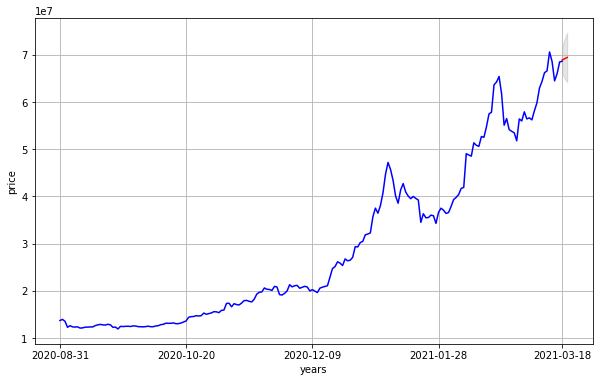

In [182]:
import matplotlib.pyplot as plt
import pandas as pd
# print(len(a),len(b))
# cc = [b,a]
len(cc)
len(columns)
aa = pd.DataFrame(a,index=b,columns=['close'])
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('years')
plt.ylabel('price')
plt.plot(aa, c='b', label='training dataset')
plt.plot(fu_list,fc, c='r',label='predicted price')
plt.fill_between(fu_list, low, up, color='k', alpha=.10)
plt.xticks([0,date/4,date/2,date*3/4,date-1])
plt.show()


In [39]:
col_name = ['colname1', 'colname2']
list1 = [[1, 2,3], [4, 5]]
list_df = pd.DataFrame(index=list1[0], columns=col_name,)
list_df

,colname1,colname2
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN


In [13]:
print(fc,se,conf)

[68681257.88866445] [1989610.34004861] [[64781693.2789007  72580822.49842821]]


In [163]:
def solution(words, queries):
    answer = []    
    for i in queries:
        con = 0
        b = i.split('?')
        bh = b[0]
        bt = b[-1]
        # b = list(filter(lambda x: len(x) != 0, b))

        for j in words:
            if len(i) == len(j):
                if len(bh) and len(bt) == 0:
                    con += 1
                elif j[:len(b[0])] == (bh):
                    con += 1
                elif j[-len(b[0]):] == (bt):
                    con += 1
        answer.append(con)          
    return answer

In [148]:
a ='??????????????hoh'
print(len(a.split('?')[-1]))
len(a.split('?')[0])
# a[-3:]
# b = a.split('?')
# # list(filter(lambda x: len(x) != 0, b))
# b =a.split('?')
# b = list(filter(lambda x: len(x) != 0, b))
# len(b[0])

3


0

In [102]:
import re
def compare(query, word):
    if re.match(query, word):
        return 1
    return 0

In [106]:
re.match('ac',"b")


In [159]:
a =["frodo", "kakao",'ooooa']
b = ["fro??", "??odo",'????o','o????','?????']
solution(a,b)
# compare(a,b)

[3, 3, 3, 3, 3]

In [22]:
def solution(ci):
    ci.sort(reverse= True)
    a = 0
    for i in ci:
        a += 1
        if i <= a:
            answer = i
            break                
    return answer

In [ ]:
def solution(ci):
    ci.sort(reverse= True)
    
    for a,i in enumerate(ci):
        if i <= a+1:
            answer = i
            break                
    return answer

In [28]:
a = [3,0,6,1,4,4,4,3,6,6,6,6,2]

print(solution(a))
a.sort(reverse=True)
a

4


[6, 6, 6, 6, 6, 4, 4, 4, 3, 3, 2, 1, 0]

In [44]:
arra = [1,5,2,6,3,7,4]
co = [[2,5,3],[4,4,1],[1,7,3]]
solution(arra,co)

[5, 6, 3]

In [28]:
def solution(numbers):
    
    
    
    answer = ''
    return answer

[5]
2


IndexError: list index out of range

In [139]:
numbers = [3,30,34,5,9,122,132,101,100]
# c = []
# a.sort(key= str)
# b = str(a[0])
# for i in a
    
#     c.append()
# a[0]/10
# for i in a:
# answer = ''
# len(str(a[2]))
ans =''
def solution(numbers):
    answer = ''
    numbers.sort(key= str)
    for i in numbers:
        if len(str(i)) > 1:
            numbers = len(str(i))
            if int(str(i)[numbers-1]) < int(str(i)[0]):
                answer = answer[:(len(str(i))-1)] + str(i) + answer[(len(str(i))-1):]
            else:
                answer = str(i)+answer 
        else:
            answer = str(i) +answer
    return answer



In [142]:
solution(numbers)
numbers.sort(key= str)
numbers

[100, 101, 122, 132, 3, 30, 34, 5, 9]